# Visualizing Proportions with Matplotlib

Visualizing proportions helps us understand how parts contribute to a whole. We'll explore:

- Pie Charts

- Donut Charts

- Stacked Bar Charts

- Percentage Bar Charts

Each section includes:

- Concept & use cases

- Two real-world examples


## What is it?

A pie chart shows how a whole is divided into parts. Each slice represents a category's proportion of the total.

✔️ Best for simple, static comparisons

❌ Avoid with too many categories

#### Example 1: Market share by smartphone brand


In [ ]:
# Import essentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


In [19]:
brands = ['Apple', 'Samsung', 'Xiaomi', 'Others']
shares = [40, 30, 20, 10]


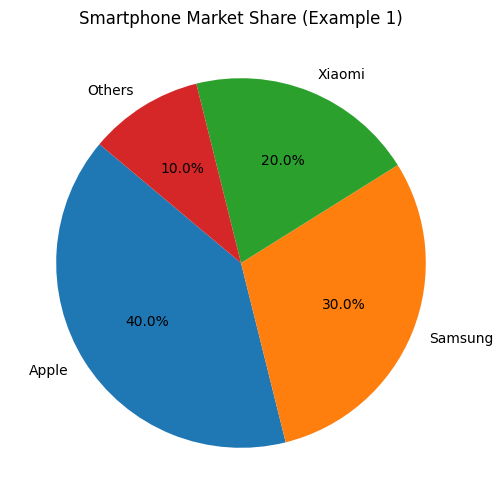

In [22]:
plt.figure(figsize=(6,6))
plt.pie(shares, labels=brands, autopct='%1.1f%%', startangle=140)
plt.title("Smartphone Market Share (Example 1)")
plt.show()


#### Example 2: Survey responses to "Preferred transport"


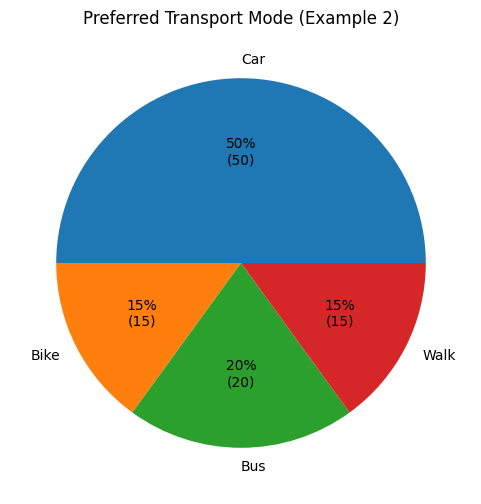

In [23]:
modes = ['Car', 'Bike', 'Bus', 'Walk']
counts = [50, 15, 20, 15]

plt.figure(figsize=(6,6))
plt.pie(counts, labels=modes, autopct=lambda p: f'{p:.0f}%\n({p*sum(counts)/100:.0f})')
plt.title("Preferred Transport Mode (Example 2)")
plt.show()


##  Donut Chart 🍩

A donut chart is a pie chart with a hole in the middle. It's visually cleaner and allows room for central labels or values.


- Good for dashboards and reports

- Offers a sleek alternative to pie charts


## Use Cases:

- Time allocation

- Revenue/source analysis

- Distribution summaries in presentations


#### Example 1: Revenue source for a startup

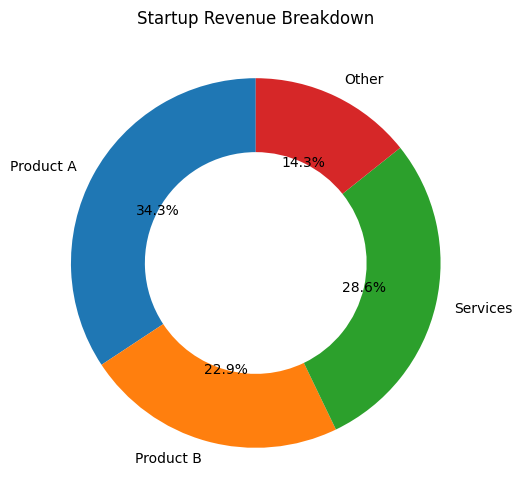

In [24]:
categories = ['Product A', 'Product B', 'Services', 'Other']
values = [120, 80, 100, 50]

plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(values, labels=categories, autopct='%1.1f%%',
                                   startangle=90, wedgeprops={'width':0.4})
plt.title("Startup Revenue Breakdown")
plt.show()


#### Example 2: Time allocation in a workday

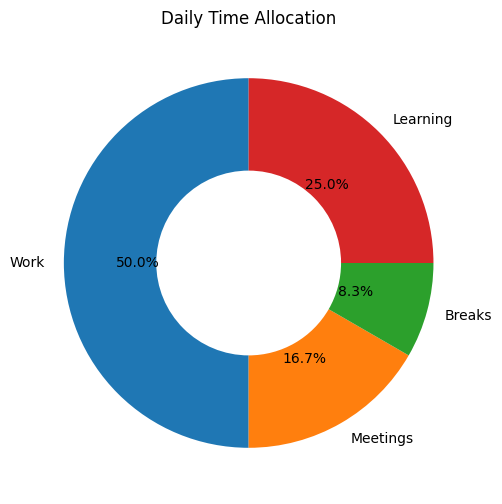

In [25]:
activities = ['Work', 'Meetings', 'Breaks', 'Learning']
hours = [6, 2, 1, 3]

plt.figure(figsize=(6,6))
plt.pie(hours, labels=activities, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.5})
plt.title("Daily Time Allocation")
plt.show()


#  Stacked Bar Chart

A stacked bar chart displays quantities of different groups stacked on top of each other, showing both totals and components.

- Excellent for multi-group comparisons

-  Shows parts and totals in one view

#### Example 1: Quarterly sales by region

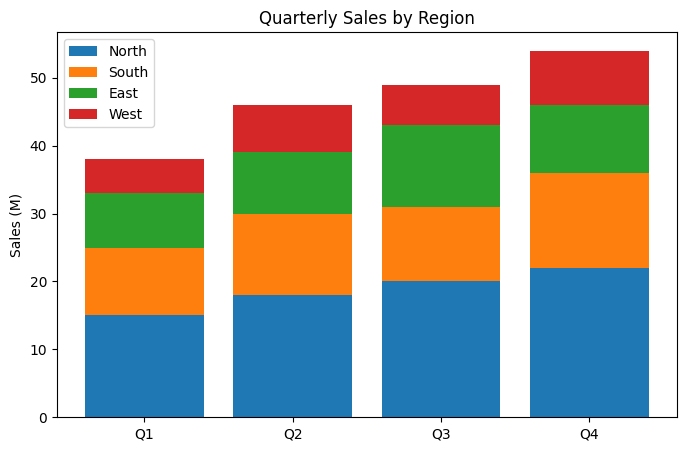

In [26]:
quarters = ['Q1','Q2','Q3','Q4']

north = [15, 18, 20, 22]
south = [10, 12, 11, 14]
east = [8, 9, 12, 10]
west = [5, 7, 6, 8]

ind = np.arange(len(quarters))
plt.figure(figsize=(8,5))
plt.bar(ind, north, label='North')
plt.bar(ind, south, bottom=north, label='South')
plt.bar(ind, east, bottom=np.array(north)+south, label='East')
plt.bar(ind, west, bottom=np.array(north)+south+east, label='West')

plt.xticks(ind, quarters)
plt.ylabel('Sales (M)')
plt.title("Quarterly Sales by Region")
plt.legend()
plt.show()


#### Example 2: Survey: hours spent per device type daily


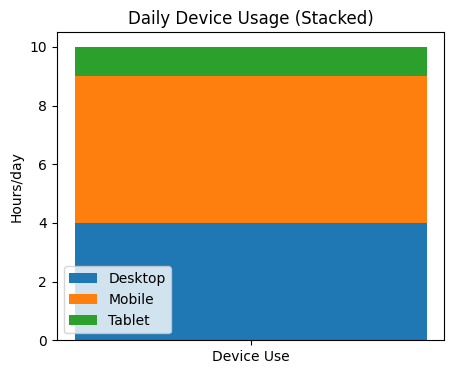

In [27]:
categories = ['Device Use']
usage = {'Desktop': [4], 'Mobile': [5], 'Tablet': [1]}

ind = np.arange(len(categories))
bottom = np.zeros(len(categories))

plt.figure(figsize=(5,4))
for device, hrs in usage.items():
    plt.bar(ind, hrs, bottom=bottom, label=device)
    bottom += hrs

plt.xticks(ind, categories)
plt.ylabel('Hours/day')
plt.title("Daily Device Usage (Stacked)")
plt.legend()
plt.show()


# 5. Percentage Bar Chart

A percentage (100%) bar chart shows normalized values where each bar sums to 100%, emphasizing the proportion of each category within groups.

- Best for comparing proportions across groups

-  Not ideal for showing raw values


#### Example 1: Email vs Social media usage by age group

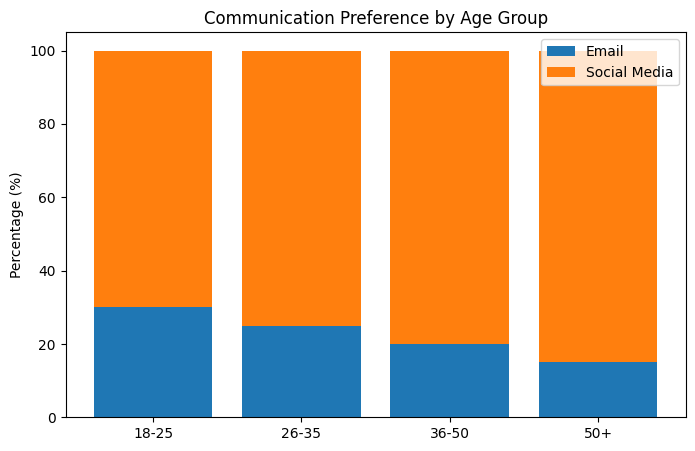

In [28]:
age_groups = ['18-25','26-35','36-50','50+']
email = np.array([30, 25, 20, 15])
social = np.array([70, 75, 80, 85])

total = email + social
email_perc = email/total*100
social_perc = social/total*100

ind = np.arange(len(age_groups))
plt.figure(figsize=(8,5))
plt.bar(ind, email_perc, label='Email')
plt.bar(ind, social_perc, bottom=email_perc, label='Social Media')

plt.xticks(ind, age_groups)
plt.ylabel('Percentage (%)')
plt.title("Communication Preference by Age Group")
plt.legend()
plt.show()


#### Example 2: Budget allocation across categories


In [ ]:
categories = ['Category']
budget = {'Rent': [40], 'Food': [25], 'Transport': [15], 'Entertainment': [20]}

ind = np.arange(len(categories))
bottom = np.zeros(len(categories))

plt.figure(figsize=(5,4))
for cat, val in budget.items():
    perc = np.array(val)  # percent values already sum to 100
    plt.bar(ind, perc, bottom=bottom, label=cat)
    bottom += perc

plt.xticks(ind, categories)
plt.ylabel('Budget %')
plt.title("Monthly Budget Allocation")
plt.legend()
plt.show()


#### Summary Tips- Use pie charts for simple, static data comparisons.


| Plot Type       | Ideal For                                | Tips                             |
| --------------- | ---------------------------------------- | -------------------------------- |
| **Pie Chart**   | Showing simple part-to-whole proportions | Use when ≤6 categories           |
| **Donut Chart** | Stylish alternative; keeps focus         | Use for visual appeal            |
| **Stacked Bar** | Compare sub-parts across categories      | Use clear legends & colors       |
| **Percent Bar** | Normalize bars to 100% for comparison    | Great for grouping by categories |


# Waffle charts

Waffle charts are an excellent addition! They're visually intuitive and great for showing proportions using a grid layout of small squares.



>  waffle chart uses a grid of squares to represent parts of a whole. Each square represents a fixed percentage (e.g., 1%) of the total. This chart is engaging and highly interpretable for audiences.



- Best for storytelling

- Not ideal for too many categories or precise comparisons

In [29]:
!pip install pywaffle

# Example 1: Gender distribution in a team


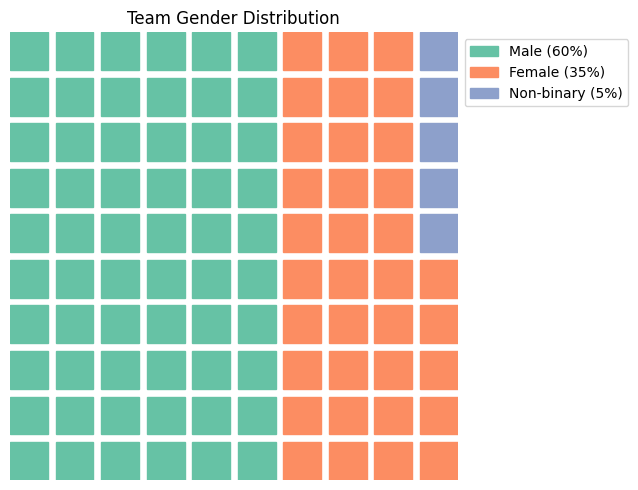

In [30]:
from pywaffle import Waffle

data = {'Male': 60, 'Female': 35, 'Non-binary': 5}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    values=data, 
    title={'label': 'Team Gender Distribution', 'loc': 'center'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(8, 5)
)
plt.show()


#### Example 2: Allocation of project time


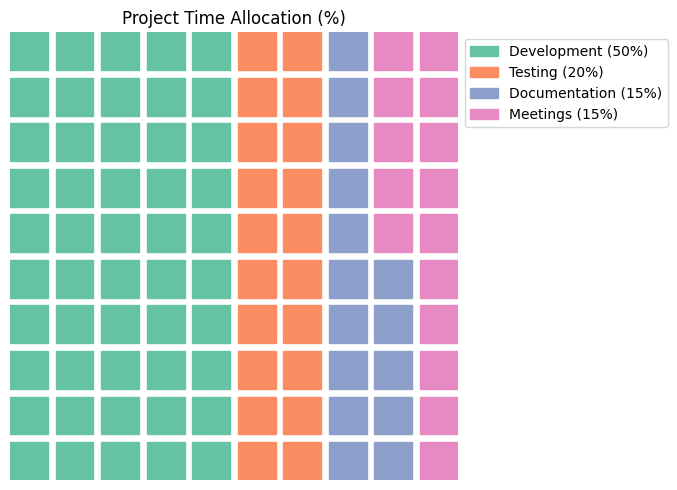

In [31]:
data = {'Development': 50, 'Testing': 20, 'Documentation': 15, 'Meetings': 15}

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    title={'label': 'Project Time Allocation (%)', 'loc': 'center'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(8, 5)
)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pywaffle import Waffle


mushrooms = pd.read_csv('../../data/mushrooms.csv')

capcolor=mushrooms.groupby(['cap-color']).count()
capcolor
  
data ={'color': ['brown', 'buff', 'cinnamon', 'green', 'pink', 'purple', 'red', 'white', 'yellow'],
    'amount': capcolor['class']
     }
  
df = pd.DataFrame(data)
  
fig = plt.figure(
    FigureClass = Waffle,
    rows = 100,
    values = df.amount,
    labels = list(df.color),
    figsize = (30,30),
    colors=["brown", "tan", "maroon", "green", "pink", "purple", "red", "whitesmoke", "yellow"],
)

### Review & Self Study

Sometimes it's not obvious when to use a pie, donut, or waffle chart. Here are some articles to read on this topic:

https://www.beautiful.ai/blog/battle-of-the-charts-pie-chart-vs-donut-chart

https://medium.com/@hypsypops/pie-chart-vs-donut-chart-showdown-in-the-ring-5d24fd86a9ce

https://www.mit.edu/~mbarker/formula1/f1help/11-ch-c6.htm

https://medium.datadriveninvestor.com/data-visualization-done-the-right-way-with-tableau-waffle-chart-fdf2a19be402

Do some research to find more information on this sticky decision.